# Topologie von Vektorfeldern

__Manfred Brill, Hochschule Kaiserslautern__


## Kritische Punkte
Die Struktur eines Vektorfelds können wir sehr gut mit Hilfe der kritischen Punkte beschreiben. Dies sind die Punkte im Definitionsbereich, an denen das Vektorfeld der Nullvektor ist. Dort berechnen wir die Jacobi-Matrix und die Eigentwerte. An Hand dieser Eigenwerte können wir beschreiben, wie sich das Vektorfeld in der Umgebung des kritischen Punkts verhalt. Wir betrachten zwei Beispiele, visualisieren sie und berechnen die Eigenwerte für einige kritische Punkte.

In [18]:
import numpy as np


def linear_example(x, y):
    """
    Vektorfeld (2x-3y, 2x+3y)
    """
    return 2.0*x - 3.0*y, 2.0*x + 3.0*y


def sinsin(x, y):
    """
    Vektorfeld (sin(x), sin(x))
    """
    return np.sin(x), np.sin(y)


## Visualisierungen
Insbesondere das Vektorfeld (sin(x), sin(y)) hat eine Menge von kritischen Punkten - an allen Vielfachen von $\pi$. In der Visualisierung auch des zweiten Beispiels erkennen wir bereits gut die Struktur des Vektorfelds in der Nähe der kritischen Punkte.

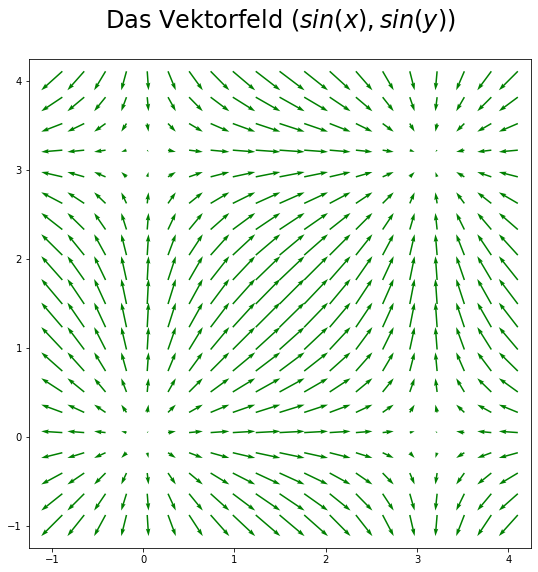

In [31]:
import matplotlib.pyplot as plt

x = np.linspace(-1.0, 4.0, 20)
y = np.linspace(-1.0,4.0, 20)
x, y = np.meshgrid(x, y)
u, v = sinsin(x, y)

plt.figure(figsize=(9.0, 9.0))
Q = plt.quiver(x, y, u, v,
               units='width',
               scale= 20,
               pivot='mid',
               color='g')
plt.title('Das Vektorfeld $(sin(x), sin(y))$',
          y=1.05, 
          fontsize=24)

plt.show()

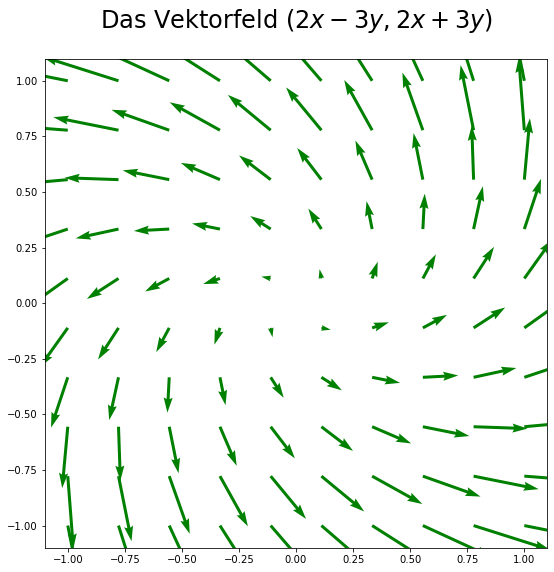

In [24]:
x = np.linspace(-1.0, 1.0, 10)
y = np.linspace(-1.0, 1.0, 10)
x, y = np.meshgrid(x, y)
u, v = linear_example(x, y)

plt.figure(figsize=(9.0, 9.0))
Q = plt.quiver(x, y, u, v,
               units='width',
               scale= 30.0,
               pivot='tail',
               color='g')
plt.title('Das Vektorfeld $(2x-3y, 2x+3y)$',
          y=1.05, 
          fontsize=24)

plt.show()

## Die Topologie
wir betrachten zuerst das Feld $(sin(x), sin(y))$, einmal im kritischen Punkt (0,0) und einmal im kritischen Punkt $(0, \pi)$.
Im Punkt $(0, 0)$ hat das Vektorfeld offensichtlich eine Quelle bzw. repelling node. Wir stellen die Jacobi-Matrix auf und erhalten:

$
J = \begin{pmatrix}cos(x)&0\\0&cos(y)\end{pmatrix}
$

Dann ist die Jacobi-Matrix im Ursprung die Einheitsmatrix. Im Punkt $(0, \pi)$ erhalten wir die Matrix

$
J = \begin{pmatrix}1&0\\0&-1\end{pmatrix}
$

Wir können bei einer Diagonalmatrix die Eigenwerte direkt ablesen, sie sind ducrh die Diagonalelemente gegeben. Die Regeln für die Topologie sagen dann auch korrekt das voraus, was wir schon an Hand der grafischen Darstellung vorausgesagt haben. Sind beide Eigenwerte reell und positiv erhalten wir eine Quelle, für reelle Eigenwerte mit unterschiedlichem Vorzeichen erhalten wir einen Sattelpunkt.

Wir besetzen die beiden Matrizen mit Hilfe von NumPy und berechnen die Eigenwerte, dann sehen wir wie dies mit Hilfe von SciPy durchzuführen ist. Da beide
Matrizen symmetrisch sind verwenden wir die Funktion *eigh*.

In [39]:
from scipy import linalg

J0 = np.eye(2, dtype=np.float64)
J1 = np.array([[1.0, 0.0], [0.0, -1.0]])

evalues, evectors = linalg.eigh(J0)
print('Die Eigenwerte der Jacobi-Matrix im Ursprung:', evalues)

evalues, evectors = linalg.eigh(J1)
print('Die Eigenwerte der Jacobi-Matrix im Punkt $(0, pi)$:', evalues)

Die Eigenwerte der Jacobi-Matrix im Ursprung: [1.+0.j 1.+0.j]
Die Eigenwerte der Jacobi-Matrix im Punkt $(0, pi)$: [ 1.+0.j -1.+0.j]


Betrachten wir unser zweites Beispiel einen *repelling focus* im Ursprung. Das bedeutet für die Eigenwerte der Jacobi-Matrix, dass sie konjugiert komplex zueinander liegen.
Da wir nur Linearformen als Koordinatenfunktionen haben ist die Jacobi-Matrix konstant. Wir besetzen wieder ein Array und berechnen die Eigenwerte mit SciPy. Hier verwenden wir die Funktion *eig*, wir haben keine symmetrische Matrix mehr und erhalten als Ausgabe für die Eigenwerte komplexe Zahlen.

In [40]:
J0 = np.array([[2.0, -3.0], [2.0, 3.0]])

evalues, evectors = linalg.eig(J0)
print('Die Eigenwerte der Jacobi-Matrix im Ursprung:', evalues)

Die Eigenwerte der Jacobi-Matrix im Ursprung: [2.5+2.39791576j 2.5-2.39791576j]


Wir sehen an der Ausgabe sehr deutlich dass die beiden Eigenwerte konjugiert komplex zueinander sind, unsere Vorhersage ist bestätigt.